# 1 官方例子
## 1.1 Boston数据详细信息

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1.2 导入SHAP，基于XGB训练SHAP模型

In [6]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train(params={"learning_rate": 0.01}, 
                      dtrain=xgboost.DMatrix(X, label=y), 
                      num_boost_round=100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[19:02:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_

- **LSTAT**, lower status of population(低地位人口占比)
- **RM**, average number of rooms per dwelling(平均房间数)
- **DIS**, weighted distances to five Boston employment centres(离五个工作商区的平均距离)
- **PTRATIO**, pupil-teacher ratio by town(学生教师人数比)
- **CRIM**, per capita crime rate by town(平均犯罪率)
- **NOX**, nitric oxides concentration, parts per 10 million(NO气体浓度，千万分之一)
- **ZN**, proportion of residential land zoned for lots over 25,000 sq.ft.(用地面积超过25000平方英尺的占比)
- **INDUS**, proportion of non-retail business acres per town(非零售经营面积占比)
- **CHAS**, Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)(是否傍河)
- **AGE**, proportion of owner-occupied units built prior to 1940(1940年以前建造的自建住宅比例)
- **TAX**, full-value property-tax rate per \$10,000(每1万美元的全额财产税税率)
- **B**, 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town(黑人人口占比)
- **MEDV**, Median value of owner-occupied homes in $1000's(自住宅价格中位数，单位1000美元)
- **RAD**, index of accessibility to radial highways(距高速公路靠近程度)

## 1.3 单样本-多特征分析

In [7]:
# 拉低房价的因素: 1. 较高的低地位人口比例; 2. 较少的平均房间数; 3. 较近的距工作地区的距离
# 抬高房价的因素: 1. 较低的学生教师比; 2. 较低的平均犯罪率; 3. 较低的一氧化氮浓度
idx = 8
shap.force_plot(explainer.expected_value, shap_values[idx,:], X.iloc[idx,:])

In [10]:
# 拉低房价的因素: 1. 较少的平均房间数; 2. 较高的学生教师比
# 抬高房价的因素: 1. 较低的低地位人口比例; 2. 较低的平均犯罪率; 3. 较低的一氧化氮浓度
idx = 100
shap.force_plot(explainer.expected_value, shap_values[idx,:], X.iloc[idx,:])

In [13]:
# 拉低房价的因素: 1. 较少的平均房间数; 2. 较高的学生教师比; 3. 较近的距工作地区的距离
# 抬高房价的因素: 1. 较低的低地位人口比例; 2. 较低的平均犯罪率
idx = 15
shap.force_plot(explainer.expected_value, shap_values[idx,:], X.iloc[idx,:])

## 1.4 多样本-单特征分析

In [3]:
# LSTAT的影响, 对正负效果影响均较大
shap.force_plot(explainer.expected_value, shap_values, X)

In [14]:
# RM的影响, 对正效果影响较大
shap.force_plot(explainer.expected_value, shap_values, X)

In [15]:
# CRIM的影响, 对负效果影响较大
shap.force_plot(explainer.expected_value, shap_values, X)

In [16]:
# 各特征的影响
shap.force_plot(explainer.expected_value, shap_values, X)

## 1.4 特征联合影响

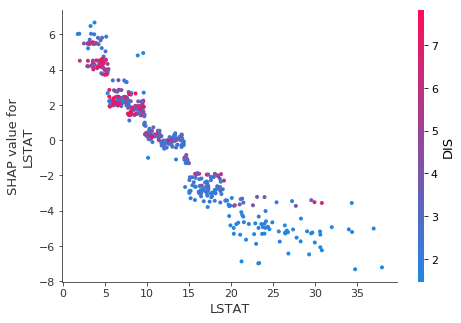

In [4]:
# 1. 低地位人口占比越高，房价越低
# 2. 距工作地区距离越近，房价越低
shap.dependence_plot("LSTAT", shap_values, X)

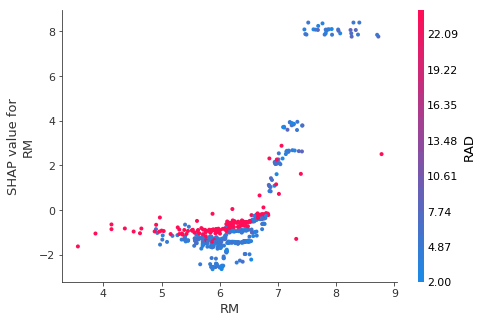

In [18]:
# 1. 平均房间数大于7之后，对房价起到较强的正效果
# 2. 距高速公路越近，房价越低
shap.dependence_plot("RM", shap_values, X)

## 1.5 特征重要性排序

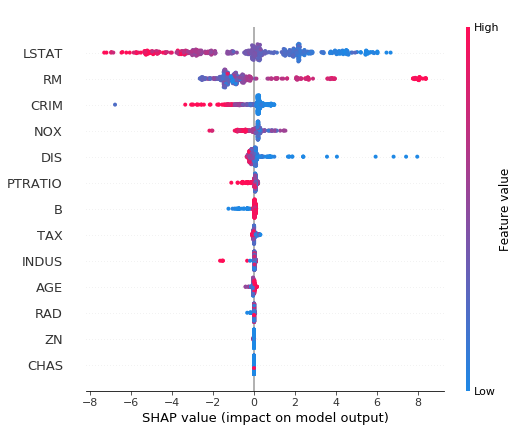

In [5]:
shap.summary_plot(shap_values, X)

# 2 SHAP用于行为外挂检测
## 2.1 数据导入

In [4]:
import os
import numpy as np
from FeatureEngineering import DataLoader

DATA_VERSION = 'v1/'
SOURCE_PATH = os.path.join('data/', DATA_VERSION)
LOGID_PATH = os.path.join('logid/', 'acts')

# load data
data = DataLoader(label_tags=['normal', 'waigua'], source_path=SOURCE_PATH, logid_path=LOGID_PATH)
data.run()
X, y = data._feature_data, data._label_data
X = np.array(X).reshape(len(X), -1)


Loading normal data...
[####################] 100%   
Loading waigua data...
[####################] 100%   

In [5]:
import json
import pandas as pd

with open('feature_dict.json', 'r') as f:
    feature_dict = json.load(f)
    
X = pd.DataFrame(X)
X.head(5)

0    1    2    3    4    5    6    7    8    9   ...   421  422  423  424  \
0  1406  102    2  213    0  374  400    6    2    0 ...     0    0    0    0   
1  1046  101    1  172    0  384  497   17   23    2 ...     0    0    0    0   
2   204   38    0   84    0  286    3    4    1    0 ...     0    0    0    0   
3   374   59    8   87    0  443    9    3    2    0 ...     0    0    0    0   
4   101   16    0   28    0  117    1    0    0    0 ...     0    0    0    0   

   425  426  427  428  429  430  
0    0    0    0    0    0    4  
1    0    0    0    0    0    2  
2    0    0    0    0    0    2  
3    0    0    0    0    0    3  
4    0    0    0    0    0    4  

[5 rows x 431 columns]

In [6]:
# 去除行为特征当中的惩罚次数相关日志，防止特征穿越
X.iloc[:, 403] = 0
X.iloc[:, 404] = 0

## 2.2 导入SHAP，训练模型

In [7]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
model = xgboost.train(params={"learning_rate": 0.01}, 
                      dtrain=xgboost.DMatrix(X, label=y), 
                      num_boost_round=100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

[20:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[20:30:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[20:30:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[20:30:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[20:30:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[20:30:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[20:30:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[20:30:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[20:30:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned no

[20:30:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[20:30:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[20:30:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[20:30:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[20:30:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[20:30:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[20:30:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[20:30:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[20:30:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned no

## 2.3 设置特征名称，便于特征分析

In [21]:
import json

feature_dict = list()
with open('feature_dict.json', 'r') as f:
    feature_dict = json.load(f)

logid_dict = list()
with open('
          .json', 'r') as f:
    logid_dict = json.load(f)
    logid_dict_reversed = {v: k for k, v in logid_dict.items()}

feature_names = [idx + ' ' + behavior + ' ' + logid_dict_reversed[behavior] 
                 for idx, behavior in feature_dict.items()
                 if behavior in logid_dict_reversed]

## 2.4 单样本-多特征分析

In [22]:
import pandas as pd

idx = 67
shap.force_plot(explainer.expected_value, shap_values[idx,:], X.iloc[idx,:], feature_names=feature_names)

In [23]:
idx = 54
shap.force_plot(explainer.expected_value, shap_values[idx,:], X.iloc[idx,:], feature_names=feature_names)

## 2.5 多样本-单特征分析

In [24]:
ids = 500
shap.force_plot(explainer.expected_value, shap_values[:idx,:], X.iloc[:idx, :], feature_names=feature_names)

In [25]:
ids = 500
shap.force_plot(explainer.expected_value, shap_values[:idx,:], X.iloc[:idx, :], feature_names=feature_names)

In [26]:
ids = 500
shap.force_plot(explainer.expected_value, shap_values[:idx,:], X.iloc[:idx, :], feature_names=feature_names)

## 2.6 联合特征分析

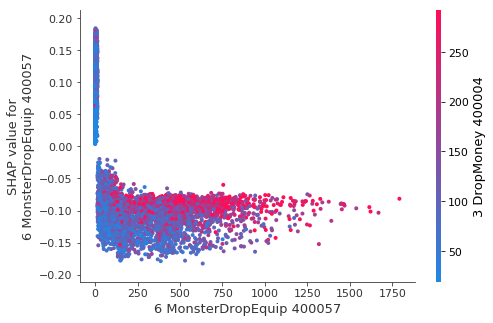

In [27]:
feature = 6
shap.dependence_plot(feature, shap_values, X, feature_names=feature_names)

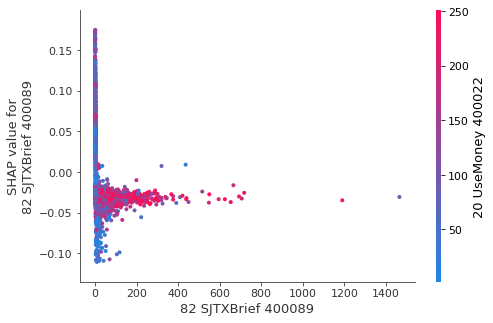

In [29]:
feature = 82
shap.dependence_plot(feature, shap_values, X, feature_names=feature_names)

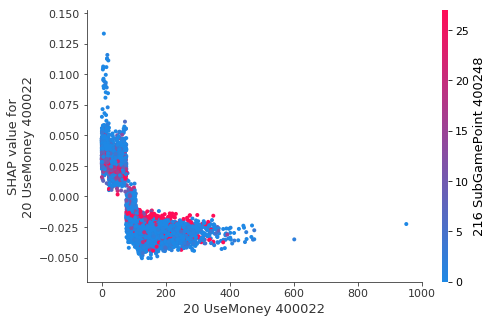

In [30]:
feature = 20
shap.dependence_plot(feature, shap_values, X, feature_names=feature_names)

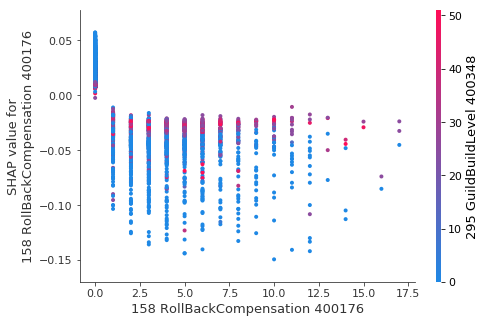

In [31]:
feature = 158
shap.dependence_plot(feature, shap_values, X, feature_names=feature_names)

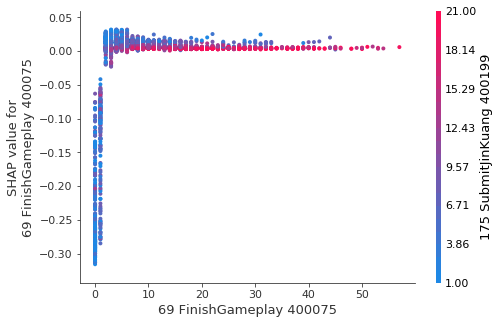

In [32]:
feature = 69
shap.dependence_plot(feature, shap_values, X, feature_names=feature_names)

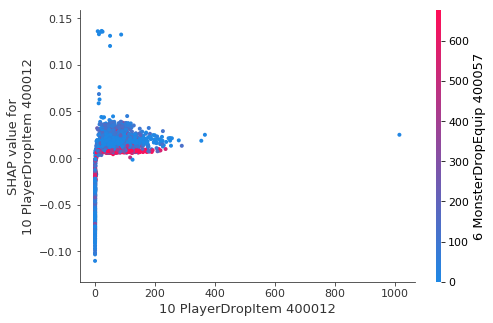

In [33]:
feature = 10
shap.dependence_plot(feature, shap_values, X, feature_names=feature_names)

## 2.6 特征重要性排序

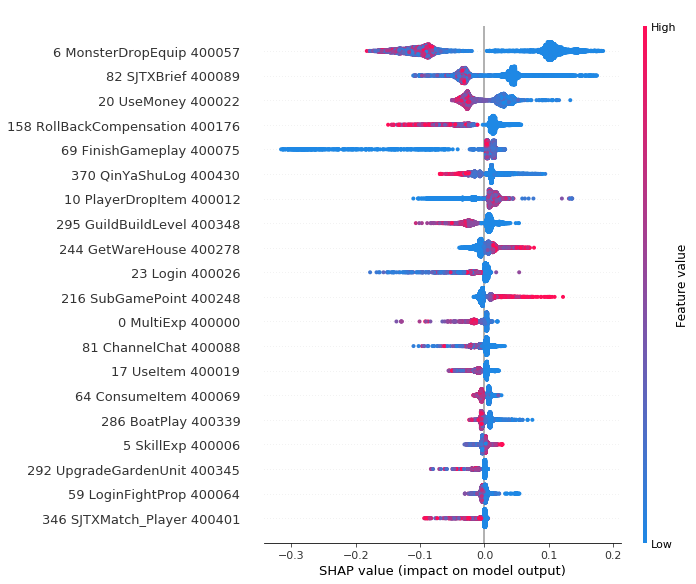

In [28]:
shap.summary_plot(shap_values, X, feature_names=feature_names)

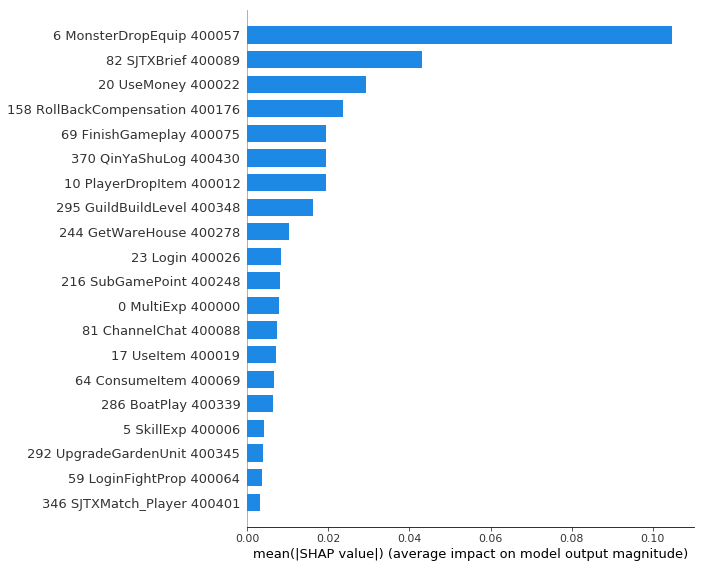

In [34]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=feature_names)